In [29]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import pandas as pd
import time
import re
import numpy as np
import spacy

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import (
    PlaintextCorpusReader,
    CategorizedPlaintextCorpusReader,
)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
tracks = pd.read_csv("data/tracks_with_lyrics.csv", index_col=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
tracks["lang"]

0         en
1         en
2         en
3         en
4         en
        ... 
13066     ko
13067     ko
13068     ko
13069    NaN
13070     ko
Name: lang, Length: 13071, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
lyr_tracks = tracks[
    ((tracks["lyrics"].isna() == False) & (tracks["lang"] == "en"))
].reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
px_df = lyr_tracks[["lyrics", "lang", "id", "genres"]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
docs = [l.replace("\n", " ") for l in lyr_tracks["lyrics"]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if not token.lower() in stopwords.words("english")
            if token.isalpha()
        ]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
preprocessed = preprocess(docs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
tfidf = TfidfVectorizer(min_df=2)
vectorized = tfidf.fit_transform(preprocessed)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
tfidf_df = pd.DataFrame(vectorized.toarray(), columns=tfidf.get_feature_names())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
tfidf_df

,aa,aaa,aaaaaaaaaaaaaaaaaaaw,aaaah,aaaahhh,aaahhhh,aah,aahhh,aak,aalegra,...,자꾸,절대,중독,지금,표정,품에,피터팬,하나,혹시,흐린
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12522
7254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to

KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None)

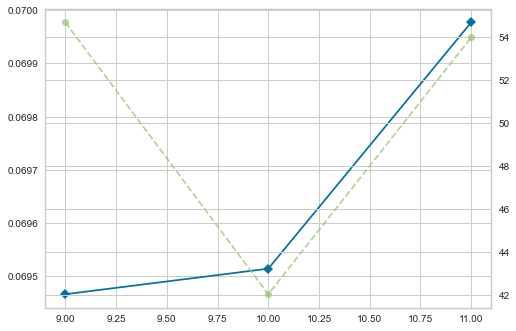

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
model = KMeans(n_jobs=-1)
visualizer = KElbowVisualizer(model=model, k=(9, 12), metric="silhouette",)

visualizer.fit(tfidf_df)

In [64]:
model = KMeans(n_clusters=11, n_jobs=-1)
clusters = model.fit_predict(vectorized.toarray())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
px_df["clst_label"] = clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
px_df["clst_label"].value_counts()

4     4250
3     1672
1      485
0      313
5      185
2      159
7      121
8       58
6       11
10       2
9        2
Name: clst_label, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
def get_keyword_counts(data):
    micro_genre_count = {}
    word_count = {}
    for x in data["genres"]:
        m_genres = x.split(", ")
        for m in m_genres:
            if m not in micro_genre_count:
                micro_genre_count[m] = 1
            else:
                micro_genre_count[m] += 1
            words = m.split(" ")
            for word in words:
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    try:
        del micro_genre_count[""]
        del word_count[""]
    except:
        pass
    return micro_genre_count, word_count

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
px_df["genres"] = px_df["genres"].fillna("not listed")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
micro_genre_count, word_count = get_keyword_counts(px_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
m_genre_series = pd.Series(micro_genre_count)
word_count_series = pd.Series(word_count)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
whole_df_m_genre_rep = m_genre_series / px_df.shape[0]
whole_df_w_count_rep = word_count_series / px_df.shape[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
clust_genre_dict = {}
clust_word_dict = {}
# this counts up every time a genre or a word shows up in a single cluster
for cl in px_df["clst_label"].unique():
    cluster_sub_df = px_df[px_df["clst_label"] == cl]
    micro_genre_count, word_count = get_keyword_counts(cluster_sub_df)

    m_genre_series = pd.Series(micro_genre_count)
    word_series = pd.Series(word_count)

    m_genre_rep = m_genre_series / cluster_sub_df.shape[0]
    w_count_rep = word_series / cluster_sub_df.shape[0]

    clust_genre_dict["cluster_" + str(cl)] = m_genre_rep
    clust_word_dict["cluster_" + str(cl)] = w_count_rep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
cluster_genre_df = pd.DataFrame(clust_genre_dict)
cluster_keyword_df = pd.DataFrame(clust_word_dict)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
all_top_7 = []
all_top_12 = []
for col in cluster_genre_df.columns:
    # find the 7 genres that occur most frequently in the cluster
    top_7_g = cluster_genre_df[col].sort_values(ascending=False)[0:7]
    # reference the index to find the values for the whole data frame
    top_7_comp = whole_df_m_genre_rep[top_7_g.index]
    print("Micro Genre Comparison")
    display(
        pd.DataFrame(
            [top_7_g, top_7_comp], index=[col, "df"]
        ).T.style.background_gradient(axis=1)
    )
    # store to help create another plotting df
    all_top_7 += list(top_7_g.index)
    top_12_w = cluster_keyword_df[col].sort_values(ascending=False)[0:12]
    top_12_comp = whole_df_w_count_rep[top_12_w.index]
    print("Keyword Comparison")
    display(
        pd.DataFrame(
            [top_12_w, top_12_comp], index=[col, "df"]
        ).T.style.background_gradient(axis=1)
    )
    all_top_12 += list(top_12_w.index)


# -----------------------------------------------------------------
# Here you can see the frequency a genre or word shows up in
# a single cluster vs the frequency it shows up in the whole dataframe
# scroll further for a more friendly visual representation of this.

Micro Genre Comparison


,cluster_1,df
rap,0.435052,0.077983
hip hop,0.301031,0.057316
pop rap,0.294845,0.073298
trap,0.265979,0.041058
pop,0.187629,0.170846
melodic rap,0.171134,0.028934
southern hip hop,0.164948,0.026867


Keyword Comparison


,cluster_1,df
rap,1.548454,0.310003
hip,1.348454,0.274869
hop,1.294845,0.249931
pop,0.934021,0.949022
trap,0.554639,0.084459
r&b,0.193814,0.139157
canadian,0.179381,0.068063
drill,0.179381,0.015569
melodic,0.173196,0.059245
southern,0.171134,0.042436


Micro Genre Comparison


,cluster_3,df
pop,0.291866,0.170846
dance pop,0.218301,0.121659
post-teen pop,0.119617,0.060485
pop rap,0.116627,0.073298
rap,0.108254,0.077983
urban contemporary,0.104665,0.054974
r&b,0.100478,0.052080


Keyword Comparison


,cluster_3,df
pop,1.334330,0.949022
rock,0.473684,0.744282
rap,0.427033,0.310003
hip,0.397129,0.274869
hop,0.351675,0.249931
r&b,0.267344,0.139157
dance,0.261364,0.181455
soul,0.225478,0.185864
country,0.194378,0.188068
contemporary,0.189593,0.119868


Micro Genre Comparison


,cluster_4,df
rock,0.135294,0.102508
pop,0.091765,0.170846
indie folk,0.079765,0.051392
pop rock,0.072706,0.065445
modern rock,0.072000,0.058005
alternative rock,0.069412,0.050703
indie pop,0.056706,0.040094


Keyword Comparison


,cluster_4,df
rock,0.962118,0.744282
pop,0.709647,0.949022
indie,0.363765,0.285478
country,0.222588,0.188068
folk,0.220471,0.146735
alternative,0.216235,0.184211
metal,0.211529,0.151832
punk,0.166588,0.124001
new,0.160000,0.137779
soul,0.155294,0.185864


Micro Genre Comparison


,cluster_2,df
rap,0.345912,0.077983
pop,0.327044,0.170846
dance pop,0.283019,0.121659
trap,0.270440,0.041058
pop rap,0.264151,0.073298
r&b,0.169811,0.052080
melodic rap,0.163522,0.028934


Keyword Comparison


,cluster_2,df
pop,1.427673,0.949022
rap,1.119497,0.310003
hip,0.811321,0.274869
hop,0.754717,0.249931
trap,0.465409,0.084459
r&b,0.402516,0.139157
rock,0.327044,0.744282
dance,0.295597,0.181455
soul,0.207547,0.185864
melodic,0.163522,0.059245


Micro Genre Comparison


,cluster_0,df
pop,0.293930,0.170846
dance pop,0.207668,0.121659
urban contemporary,0.162939,0.054974
quiet storm,0.146965,0.044503
r&b,0.146965,0.052080
soul,0.146965,0.053320
motown,0.124601,0.041196


Keyword Comparison


,cluster_0,df
pop,1.277955,0.949022
rock,0.523962,0.744282
soul,0.396166,0.185864
dance,0.287540,0.181455
r&b,0.265176,0.139157
rap,0.230032,0.310003
contemporary,0.220447,0.119868
hip,0.210863,0.274869
indie,0.191693,0.285478
new,0.188498,0.137779


Micro Genre Comparison


,cluster_5,df
pop,0.362162,0.170846
dance pop,0.318919,0.121659
urban contemporary,0.140541,0.054974
pop rap,0.135135,0.073298
r&b,0.124324,0.052080
rap,0.102703,0.077983
tropical house,0.091892,0.037338


Keyword Comparison


,cluster_5,df
pop,1.567568,0.949022
rock,0.589189,0.744282
hip,0.437838,0.274869
rap,0.405405,0.310003
dance,0.378378,0.181455
hop,0.351351,0.249931
r&b,0.259459,0.139157
house,0.243243,0.105814
contemporary,0.200000,0.119868
indie,0.183784,0.285478


Micro Genre Comparison


,cluster_7,df
pop,0.355372,0.170846
dance pop,0.305785,0.121659
r&b,0.181818,0.052080
urban contemporary,0.165289,0.054974
post-teen pop,0.165289,0.060485
rap,0.140496,0.077983
pop rap,0.140496,0.073298


Keyword Comparison


,cluster_7,df
pop,1.603306,0.949022
rock,0.652893,0.744282
hip,0.429752,0.274869
r&b,0.421488,0.139157
rap,0.388430,0.310003
dance,0.388430,0.181455
hop,0.338843,0.249931
soul,0.289256,0.185864
indie,0.256198,0.285478
contemporary,0.190083,0.119868


Micro Genre Comparison


,cluster_9,df
roots reggae,1.000000,0.009920
reggae fusion,1.000000,0.013916
reggae,1.000000,0.013640
pop rap,1.000000,0.073298
pop,1.000000,0.170846
modern reggae,1.000000,0.015293
lovers rock,1.000000,0.009093


Keyword Comparison


,cluster_9,df
reggae,4.000000,0.060347
pop,2.000000,0.949022
roots,1.000000,0.029347
rock,1.000000,0.744282
rap,1.000000,0.310003
modern,1.000000,0.126481
lovers,1.000000,0.009093
fusion,1.000000,0.022045
dancehall,1.000000,0.037889
"""australian",nan,0.000138


Micro Genre Comparison


,cluster_8,df
dance pop,0.275862,0.121659
pop,0.241379,0.170846
soul,0.241379,0.053320
funk,0.241379,0.048636
pop rap,0.224138,0.073298
hip hop,0.189655,0.057316
urban contemporary,0.189655,0.054974


Keyword Comparison


,cluster_8,df
pop,1.172414,0.949022
hip,0.844828,0.274869
rap,0.724138,0.310003
hop,0.706897,0.249931
soul,0.431034,0.185864
rock,0.413793,0.744282
funk,0.379310,0.090934
dance,0.310345,0.181455
contemporary,0.224138,0.119868
metal,0.189655,0.151832


Micro Genre Comparison


,cluster_6,df
rock,0.454545,0.102508
art rock,0.363636,0.025351
classic rock,0.363636,0.032654
dance rock,0.363636,0.031276
alternative rock,0.272727,0.050703
folk rock,0.272727,0.031276
post-punk,0.272727,0.011160


Keyword Comparison


,cluster_6,df
rock,3.181818,0.744282
folk,0.727273,0.146735
art,0.545455,0.047534
pop,0.454545,0.949022
wave,0.363636,0.084872
indie,0.363636,0.285478
classic,0.363636,0.078672
dance,0.363636,0.181455
alternative,0.272727,0.184211
reggae,0.272727,0.060347


Micro Genre Comparison


,cluster_10,df
southern soul,1.000000,0.013089
soul,1.000000,0.053320
soft rock,1.000000,0.033894
quiet storm,1.000000,0.044503
philly soul,1.000000,0.001378
motown,1.000000,0.041196
funk,1.000000,0.048636


Keyword Comparison


,cluster_10,df
soul,4.000000,0.185864
storm,1.000000,0.044503
southern,1.000000,0.042436
soft,1.000000,0.033894
rock,1.000000,0.744282
quiet,1.000000,0.044503
philly,1.000000,0.005649
motown,1.000000,0.041334
funk,1.000000,0.090934
disco,1.000000,0.026040


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
num_keywords = 5
num_topics = 11

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
vectorizer = CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics, learning_method="online")

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [
    [
        (vectorizer.get_feature_names()[i], topic[i])
        for i in topic.argsort()[: -num_keywords - 1 : -1]
    ]
    for topic in model.components_
]

topics = [[x[0] for x in i] for i in results]
topics

[['ya', 'call', 'without', 'parti', 'le'],
 ['good', 'man', 'get', 'shake', 'like'],
 ['high', 'burn', 'fire', 'sun', 'fli'],
 ['rose', 'nobodi', 'turn', 'might', 'alreadi'],
 ['la', 'mi', 'dem', 'di', 'yuh'],
 ['rain', 'eh', 'funk', 'ladi', 'thunder'],
 ['hey', 'ah', 'rock', 'danc', 'follow'],
 ['chorus', 'know', 'vers', 'time', 'never'],
 ['love', 'na', 'oh', 'yeah', 'babi'],
 ['got', 'like', 'yeah', 'get', 'ai'],
 ['go', 'run', 'away', 'dey', 'give']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>